# Box Filtering Algorithm

This notebook is a simple implementation of the box filter algorithm and a simple implementation of the Running box filter algorithm, an improvement of the first one.



In [27]:
%matplotlib inline
from skimage.exposure import rescale_intensity
import cv2
import os 
from matplotlib import pyplot as plt
import numpy as np
import time

In [54]:
__file__ = "pics/tulipan.png"
dir_path = os.path.dirname(os.path.realpath(__file__))
print(dir_path)
image = cv2.imread(__file__,2)
#cv2.imshow("image",image)
#cv2.waitKey()

C:\Users\Mike\Documents\MASTER\BUDAPEST\Image Processing\pics


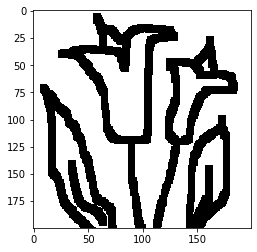

(200, 200)

In [55]:
plt.imshow(image,cmap="gray")
plt.show()
image.shape

In [47]:
kernel = np.full((3, 3), 1/9)
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [48]:
def convolution(image,kernel):
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
    print(image.shape)
    print(output.shape)
    for y in np.arange(pad, iH + pad):
            for x in np.arange(pad, iW + pad):
                # extract the ROI of the image by extracting the
                # *center* region of the current (x, y)-coordinates
                # dimensions
                roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

                # perform the actual convolution by taking the
                # element-wise multiplicate between the ROI and
                # the kernel, then summing the matrix
                k = (roi * kernel).sum()

                # store the convolved value in the output (x,y)-
                # coordinate of the output image
                output[y - pad, x - pad] = k
    # rescale the output image to be in the range [0, 255]
    #output = rescale_intensity(output, in_range=(0, 255))
    #output = (output * 255).astype("uint8")
    return output

In [49]:
start = time.time()
output = convolution(image,kernel)
end = time.time()
print(end - start)

(202, 202)
(200, 200)
0.20943927764892578


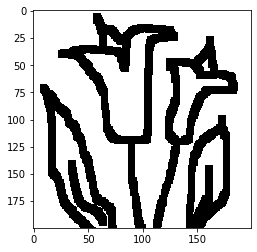

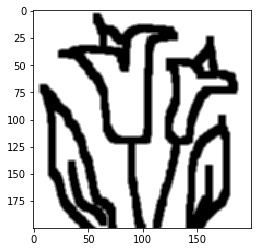

In [50]:
f1 = plt.figure(1)
plt.imshow(image,cmap="gray")
f2 = plt.figure(2)
plt.imshow(output,cmap="gray")

plt.show()


## Implementing Running box filter here: 

In [51]:
def fastRunning(image,kernel):
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    pad = (kW - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
    print(image.shape)
    print(output.shape)
    
    #Initialize S
    S = np.zeros((1,iW+pad+pad))
    y = 1
    x = 1
    roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
    k = roi*kernel
    S[0,0:3] = [sum(t) for t in zip(*k)]
    for x in np.arange(pad+1, iW+pad):
        roi = image[y-pad:y+pad+1,x+1]
        k = (roi*kernel[y-pad:y+pad+1,2]).sum()
        S[0,x+1] = k
    #S initialized
    
    
    # Recalculate S and create output pixel for every row and column
    for y in np.arange(pad, iH + pad):
        if y > pad:
            S = S - image[y-pad-1,:]*kernel[0,0] + image[y+1,:]*kernel[0,0]
        Sum = S[0,0]+S[0,1]+S[0,2]
        for x in np.arange(pad, iW + pad):
            if x>pad:
                Sum = Sum - S[0,x-2] + S[0,x+1]
            output[y - pad, x - pad] = Sum
            

                
                
    # rescale the output image to be in the range [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    return output

In [52]:
start = time.time()
output = fastRunning(image,kernel)
end = time.time()
print(end - start)

(202, 202)
(200, 200)
0.053649187088012695


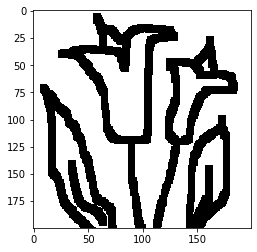

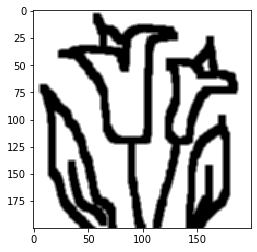

In [53]:
f1 = plt.figure(1)
plt.imshow(image,cmap="gray")
f2 = plt.figure(2)
plt.imshow(output,cmap="gray")

plt.show()
